<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml1017/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
# 統計需要資料量:
# ML: 1k以上  DL: 1w以上
# 資料量多寡 -> 問題難度(大概跟你欄位數目掛勾)
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["ans"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [99]:
# 處理資料: pandas -> DataFrame
# 進到sklearn: numpy -> array
import numpy as np
from sklearn.model_selection import train_test_split
x = df.drop("ans", axis=1)
x = np.array(x)
y = np.array(df["ans"])
# [90% x, 10% x, 90% y, 10% y]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [100]:
# axis!!!!
d = pd.DataFrame([
    [1, 2],
    [3, 4]
], columns=["a", "b"], index=["a", "b"])
d.drop("a", axis=1)

,b
a,2
b,4


In [101]:
train_test_split([1, 2, 3, 4],
        [5, 6, 7, 8],
        test_size=0.25)

[[3, 2, 1], [4], [7, 6, 5], [8]]

In [102]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 135\nvalue = [42, 46, 47]\nclass = virginica'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 93\nvalue = [0, 46, 47]\nclass = virginica'),
 Text(0.4, 0.16666666666666666, 'gini = 0.18\nsamples = 50\nvalue = [0, 45, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.045\nsamples = 43\nvalue = [0, 1, 42]\nclass = virginica')]

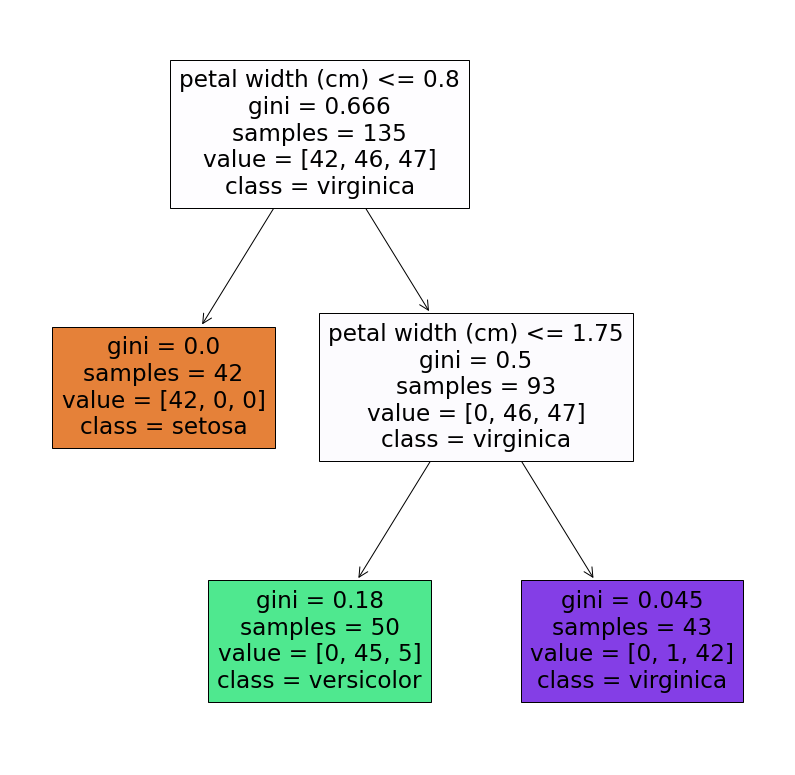

In [103]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(14, 14))
plot_tree(clf, 
     feature_names=iris["feature_names"], 
     filled=True,
     class_names=iris["target_names"])

In [104]:
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(y_test, pre)

1.0